# Regresión lineal simple y multiple

## Regresión lineal simple

In [2]:
# Regresión lineal simple en Python (con 1 variable)
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot') 
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("./articulos_ml.csv")

In [4]:
data.shape

(161, 8)

In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


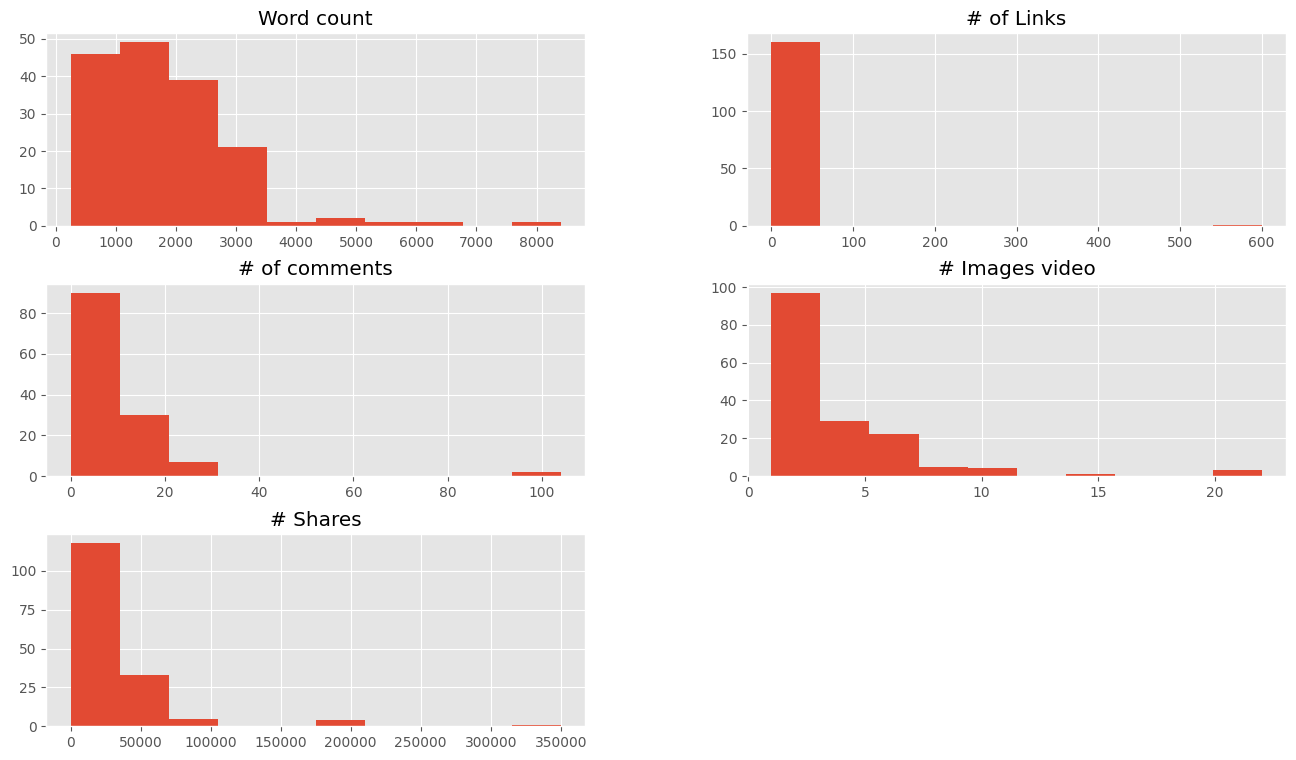

In [7]:
data.drop(['Title','url', 'Elapsed days'],axis=1).hist() 
plt.show()

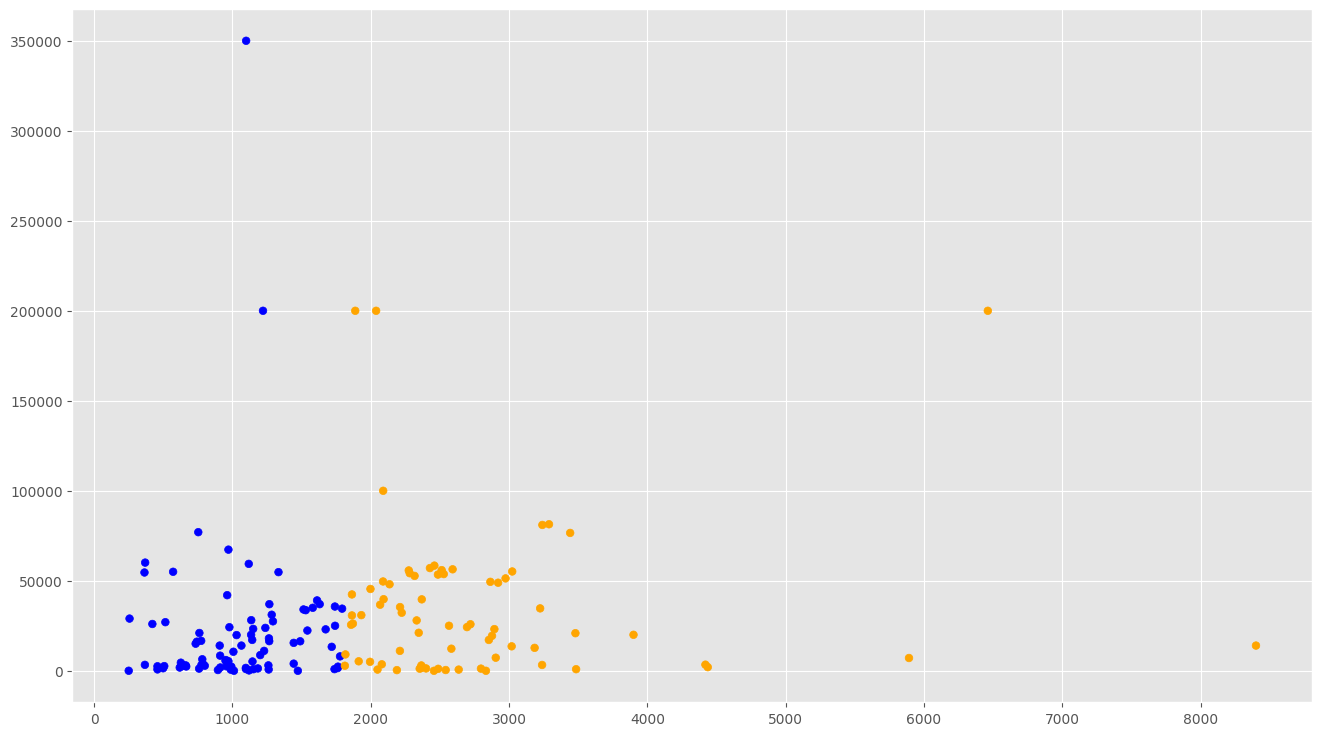

In [8]:
colores=['orange','blue'] 
tamanios=[30,60] 
 
f1 = data['Word count'].values 
f2 = data['# Shares'].values 
 
asignar=[] 
for index, row in data.iterrows(): 
    if(row['Word count']>1808): 
        asignar.append(colores[0]) 
    else: 
        asignar.append(colores[1]) 
     
plt.scatter(f1, f2, c=asignar, s=tamanios[0]) 
plt.show()

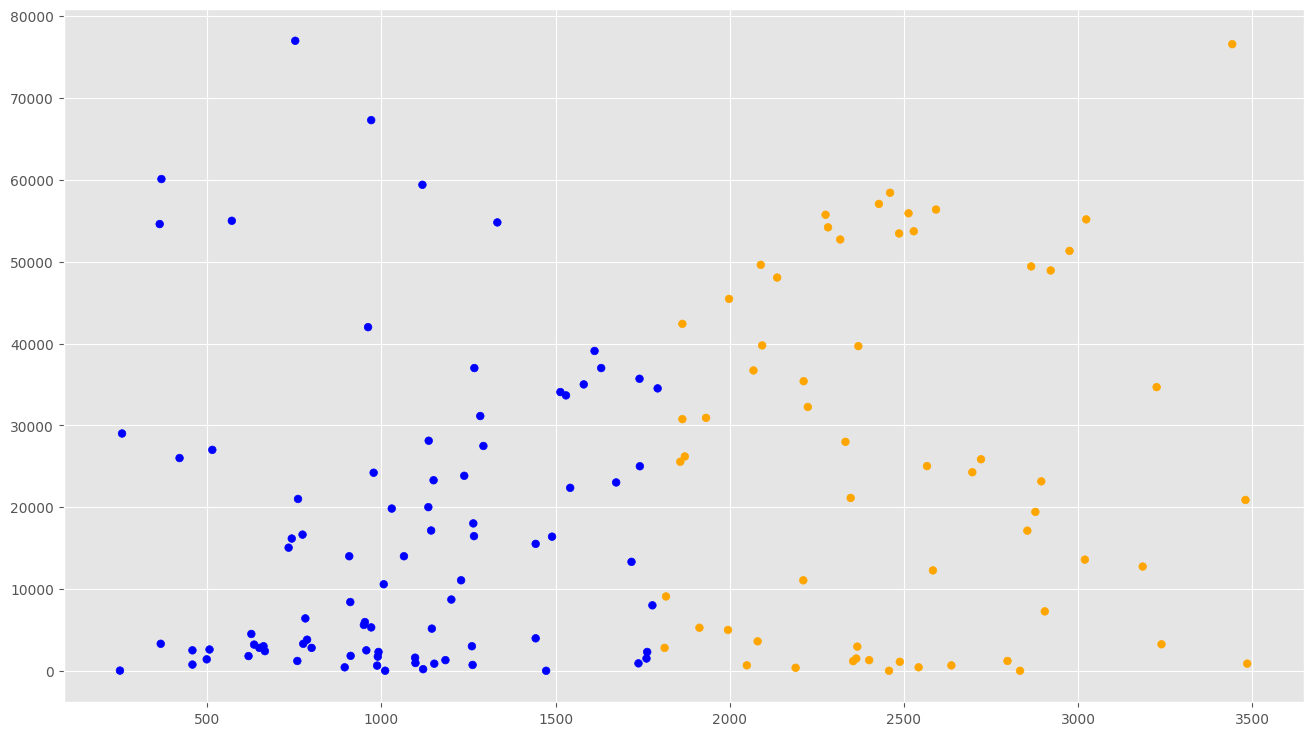

In [9]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)] 
 
f1 = filtered_data['Word count'].values 
f2 = filtered_data['# Shares'].values 
 
""" Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de 
Palabras """
asignar=[] 
for index, row in filtered_data.iterrows(): 
    if(row['Word count']>1808): 
        asignar.append(colores[0]) 
    else: 
        asignar.append(colores[1]) 
     
plt.scatter(f1, f2, c=asignar, s=tamanios[0]) 
plt.show()

In [10]:
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [11]:
dataX =filtered_data[["Word count"]] 
X_train = np.array(dataX) 
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear 
regr = linear_model.LinearRegression() 
 
# Entrenamos nuestro modelo 
regr.fit(X_train, y_train) 
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D) 
y_pred = regr.predict(X_train) 
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente 
print('Coefficients: \n', regr.coef_) 
# Este es el valor donde corta el eje Y (en X=0) 
print('Independent term: \n', regr.intercept_) 
# Error Cuadrado Medio 
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred)) 
# Puntaje de Varianza. El mejor puntaje es un 1.0 
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


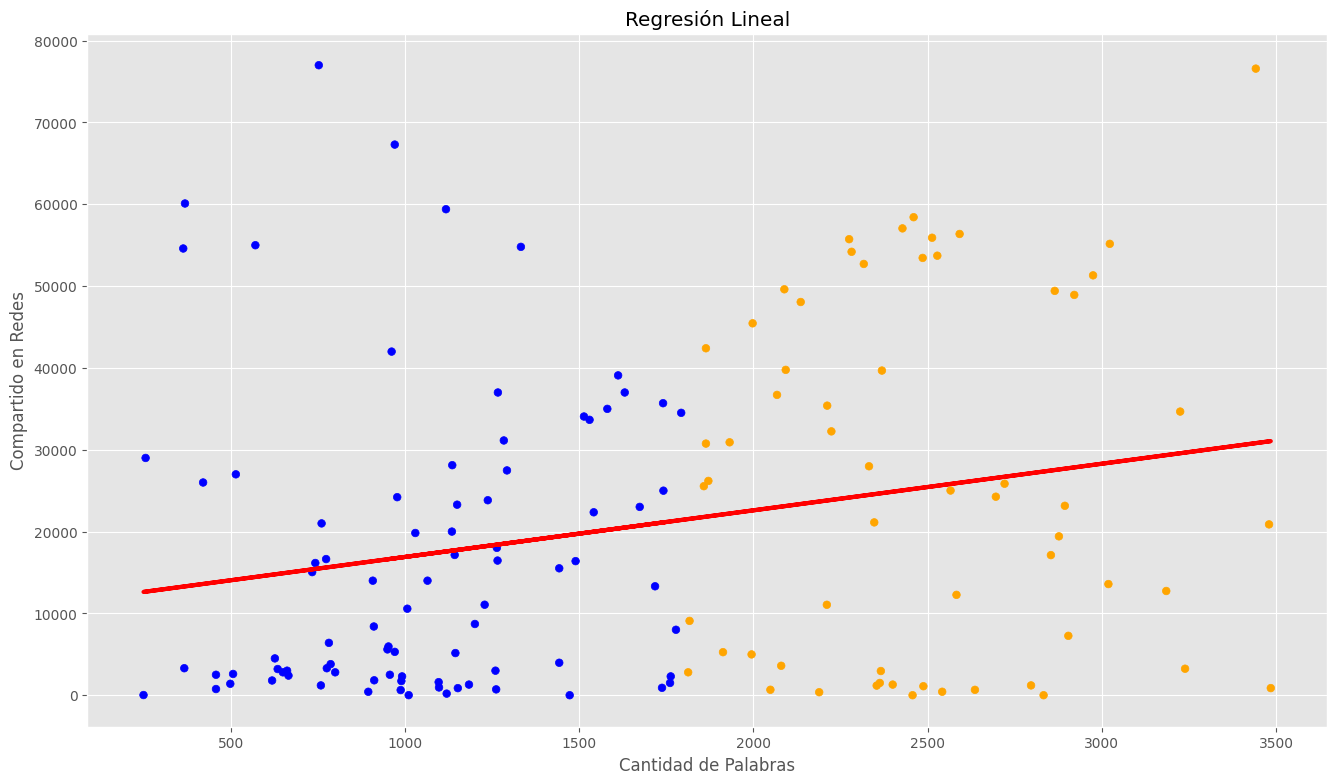

In [12]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0]) 
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3) 
 
plt.xlabel('Cantidad de Palabras') 
plt.ylabel('Compartido en Redes') 
plt.title('Regresión Lineal') 
 
plt.show()

In [15]:
y_Dosmil = regr.predict([[2000]]) 
print(int(y_Dosmil))

22595


C:\Users\migue\AppData\Local\Temp\ipykernel_18896\3072437105.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


## Regresión lineal multiple

In [16]:
# Regresión linear multiple
# Vamos a intentar mejorar el Modelo, con una dimensión más:  
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, 
# comentarios e imágenes 
 
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video']) 
 
dataX2 =  pd.DataFrame() 
dataX2["Word count"] = filtered_data["Word count"] 
dataX2["suma"] = suma 
XY_train = np.array(dataX2) 
z_train = filtered_data['# Shares'].values

In [17]:
# Creamos un nuevo objeto de Regresión Lineal 
regr2 = linear_model.LinearRegression() 
 
# Entrenamos el modelo, esta vez, con 2 dimensiones 
# obtendremos 2 coeficientes, para graficar un plano 
regr2.fit(XY_train, z_train) 
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado 
z_pred = regr2.predict(XY_train) 
 
# Los coeficientes 
print('Coefficients: \n', regr2.coef_) 
# Error cuadrático medio 
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred)) 
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible) 
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


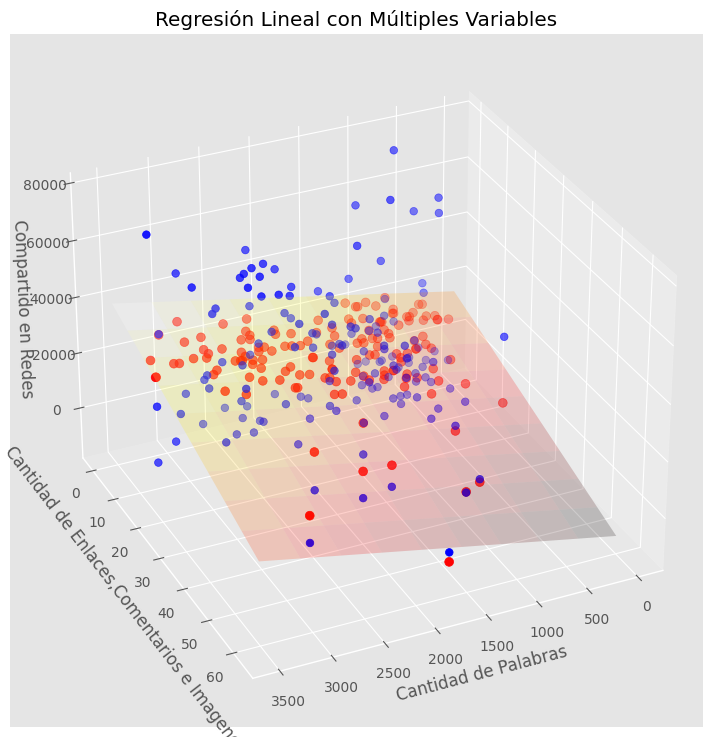

In [18]:
fig = plt.figure() 
#ax = Axes3D(fig) 
ax = fig.add_subplot(111, projection='3d') 
 
# Creamos una malla, sobre la cual graficaremos el plano 
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10)) 
 
# calculamos los valores del plano para los puntos x e y 
nuevoX = (regr2.coef_[0] * xx) 
nuevoY = (regr2.coef_[1] * yy)  
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción 
z = (nuevoX + nuevoY + regr2.intercept_) 
 
# Graficamos el plano 
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot') 
 
# Graficamos en azul los puntos en 3D 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30) 
 
# Graficamos en rojo, los puntos que  
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40) 
 
# con esto situamos la "camara" con la que visualizamos 
ax.view_init(elev=30., azim=65) 
         
ax.set_xlabel('Cantidad de Palabras') 
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes') 
ax.set_zlabel('Compartido en Redes') 
ax.set_title('Regresión Lineal con Múltiples Variables') 
 
plt.show()

In [19]:
z_Dosmil = regr2.predict([[2000, 10+4+6]]) 
print(int(z_Dosmil))

20518


C:\Users\migue\AppData\Local\Temp\ipykernel_18896\2595619746.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z_Dosmil))


In [20]:
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred) 
print(mejoraEnError)

20765911.860715985


In [21]:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred) 
print(mejoraEnVarianza)

0.052615337462582956


In [22]:
diferenciaComparir = z_Dosmil - y_Dosmil 
print(int(diferenciaComparir))

-2077


C:\Users\migue\AppData\Local\Temp\ipykernel_18896\750035444.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(diferenciaComparir))


# Preguntas

**1. ¿Por qué era importante evaluar si existe una relación entre la cantidad de palabras y la cantidad de shares de un artículo?**

Para determinar si la variable independiente X (las palabras) tenía una relación con la variable independiente Y (shares) y la tiene la cual es del tipo débil, además para inferir si la cantidad de shares aumenta según el número de palabras en un artículo de machine learning, y esta afirmación es verdadera ya que se puede comprobarlo en las gráficas de dispersión y dando un dato de entrada para predecir sus shares según la cantidad de palabras.

**2. Al analizar los histogramas iniciales, ¿qué patrones observaste en la distribución de palabras y shares? ¿Cómo influye esto en la selección del modelo?**

Que conforme aumenta el número de palabras en el artículo, incrementan en cierta cantidad los shares. Respecto a las primera gráficas.

**3. ¿Qué propósito tuvo filtrar los artículos con menos de 3500 palabras y menos de 80,000 shares? ¿Cómo cambió el comportamiento del modelo después del filtrado?**

Visualmente se ven más dispersos al reducir significativamente las palabras que a comparación de las otras gráficas anteriores. En si la diferencia con las anteriores es que en esta los datos se ven más dispersos que a comparación de las anteriores en donde están más compactos; todo esto debido a que, se redujo las palabras a 3500.

**4. ¿Por qué crees que había tanta concentración de puntos en estas zonas? ¿Cómo afecta esto al desempeño de la regresión lineal?**

Tomando como referencia la ultima grafica (en donde se redujo las palabras a 3500) desde 500 a 2500 en el eje X, creo yo que hay mayor concentración de puntos dado la retención de lectura e interés por parte de los usuarios que son los que efectúan los shares; entonces se puede inferir que, con una muestra de artículos en donde el máximo de palabras es de 3500, lo más adecuado y recomendable seria que minimo, el artículo alcanzara a tener 2500 palabras como mínimo para esperar una cantidad de shares aceptable la cual si se introduce en el modelo sería de 25444 shares. Y lo afectará si solo se toman datos de 3500 palabras únicamente, dado que el modelo se entrenó con 8000 palabras en relación a 80000 shares.

**5. En el modelo de regresión simple, ¿qué significa la pendiente del modelo respecto a la relación Word Count → Shares? Explica en tus palabras.**

La pendiente en la última gráfica de la regresión lineal logística indica que hay una correlación lineal débil positiva entre los datos “Palabras” y “Shares”. Y es débil dado a que no todos los datos están agrupados del todo en la pendiente, sino que están ligeramente dispersos entre sí.

**6. El error cuadrático medio (MSE) fue alto en el primer modelo. ¿Qué factores en los datos podrían explicar este resultado?**

Una de las mejoras en la disminución del error cuadrático medio, sería la adición de una tercera variable (Z) en el modelo  y además la alteración del contenido de dataX2 añadiendo le la variable suma que contiene los re resultados de sumar las columnas de: “of links”, “of comments” y “Images video”. Además de esto se vuelve a entrenar el modelo pero ahora con la variación que se comentó y aclarando que ahora son dos dimensiones; entonces dada las razones que se comentaron, es por eso que este modelo de regresión lineal múltiple tuvo un error cuadrático medio diferente al primer modelo.

**7. Observa el R² obtenido: ¿Crees que la cantidad de palabras es un buen predictor de los shares? ¿Por qué sí o por qué no?**

Si creo que las palabras son un buen predictor de la cantidad de shares en un artículo, y lo creo dado a que en el primer modelo se puede apreciar tanto en la gráfica como probando el modelo que claramente si se agrega una cantidad de palabras y después se agrega otra y se compara entre sí, se puede decir que las palabras son un buen predictor de que los shares aumentaran en relación a las palabras que se tengan.

**8. En los gráficos que distinguen artículos por encima y por debajo de la media (1808 palabras), ¿qué diferencias observaste en la dispersión?**

Que los patos con una cantidad menor a 1808 palabras, están menos dispersos que a comparación de los que tienen más. Y esto puede apreciarse dado que únicamente se logra visualizar que dos puntos que están por debajo de las 1808 palabras están excluidos del conjunto de puntos; y respecto a la otra muestra (la que tiene más de 1808 palabras) se puede notar que los puntos están más dispersos y excluidos entre sí.

**9. ¿Te parece que la línea de regresión se ajusta bien a los datos? Argumenta basándote en la dispersión.**

Dada la ultima grafica en el modelo de regresión lineal simple, se puede decir que la línea de correlación está posicionada correctamente dado que no todos los datos (puntos) agrupados en un solo conjunto están compactados entre cada si no que están dispersos e incluso antes de lograr ver la línea de correlación se esperaba que fuera una correlación débil positiva porque no hay una agrupación de puntos entre cada uno que sea notoria por arriba de 10000 shares.